<a href="https://colab.research.google.com/github/jainrasik/Face-emotion-Recognisation-Rasik-Jain/blob/main/Individual_colab_Face_Emotion_Recognisation_Rasik_jain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is face emotion recognisation for live class monitoring system

This is an Individulal project done by Rasik Jain


#Project Indroduction
The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms.

One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention.

Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms.

Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

In [ ]:
# Getting the Data-Set from dropbox
!wget https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip

--2021-09-19 12:42:45--  https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/si11cws2pyho1bp/archive.zip [following]
--2021-09-19 12:42:45--  https://www.dropbox.com/s/raw/si11cws2pyho1bp/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2567f9901885af07eabc885caf.dl.dropboxusercontent.com/cd/0/inline/BWfBRCla6OrKlzdlodCi0ixyLLYGko5qFmY5wrOuTPHkxFwEcZ1C4mbAZGvMnRkH_lWVRhhcTdUVV9gXI-b8TvBNAV-CYXmS2nQDxDZ4ZlS4hSKXZ9ihf4yPzvD6IirNjvQ3vt84R317y88lF_d6M6T3/file# [following]
--2021-09-19 12:42:45--  https://uc2567f9901885af07eabc885caf.dl.dropboxusercontent.com/cd/0/inline/BWfBRCla6OrKlzdlodCi0ixyLLYGko5qFmY5wrOuTPHkxFwEcZ1C4mbAZGvMnRkH_lWVRhhcTdUVV9gXI-b8TvBNAV-CY

In [ ]:
# Unzipping the dataset
!unzip  -q "/content/archive.zip" 

In [ ]:
# Importing Neccessary Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# locating path and creating classes from dataset
trainpath=Path("/content/train")
Classes=[str(list(trainpath.glob("*"))[i]).split('/')[-1] for i in range(len(list(trainpath.glob("*"))))]
Classes

['surprise', 'neutral', 'fear', 'angry', 'disgust', 'happy', 'sad']

In [ ]:
# Reading sample image from dataset
img_array=cv2.imread('/content/train/sad/Training_49187727.jpg')

In [ ]:
# Checking the dimension of the image
img_array.shape

(48, 48, 3)

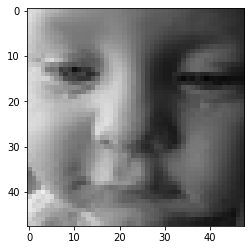

In [ ]:
# displaying the image
plt.imshow(img_array)

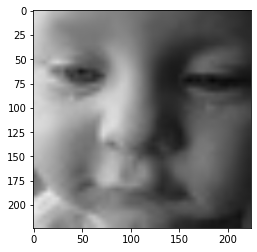

In [ ]:
# resizing the image so to make compatible with input of mobilenetv2 model
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# converting the path to string type
pathlist=list(map(lambda x: str(x), list(trainpath.glob("*/*"))))

In [ ]:
# loading the training data
training_data=[]
for path in pathlist:
  img_array=cv2.imread(path)
  new_array=cv2.resize(img_array,(img_size,img_size))
  Class_label=Classes.index(path.split('/')[-2])
  training_data.append([new_array,Class_label])

In [ ]:
# shuffling the data
import random
random.shuffle(training_data)
training_data=training_data[:1000]

In [ ]:
# creating dependent and independent variable
X=[]
y=[]
for feature, label in training_data:
  X.append(feature)
  y.append(label)

In [ ]:
# normalizing the data
X=np.array(X).reshape(-1,img_size,img_size,3)/255
y=np.array(y)

In [ ]:
# loading the mobilenetv2 model to apply transfer learning
model=tf.keras.applications.MobileNetV2()

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
# Checking the structure of the model
model.summary()

In [ ]:
# setting our model input as input layer of mobilenetv2
base_input=model.layers[0].input

In [ ]:
# taking the layer before final outpur in mobilenetv2
base_output=model.layers[-2].output

In [ ]:
# adding two layer and then the last final layer where output correspond to number of class present in our problem i.e. 7
final_output=layers.Dense(128)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)

In [ ]:
# setting input and output layer of our new model
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [ ]:
# Checking the structure of new model
new_model.summary()

In [ ]:
# compiling the model
new_model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
# fitting the data in our model
new_model.fit(X,y,epochs=30)

Epoch 1/30
32/32 [==============================] - 197s 6s/step - loss: 1.2767 - accuracy: 0.5130
Epoch 2/30
32/32 [==============================] - 197s 6s/step - loss: 0.9928 - accuracy: 0.6390
Epoch 3/30
32/32 [==============================] - 192s 6s/step - loss: 0.9798 - accuracy: 0.6570
Epoch 4/30
32/32 [==============================] - 192s 6s/step - loss: 0.7947 - accuracy: 0.7230
Epoch 5/30
32/32 [==============================] - 190s 6s/step - loss: 0.5949 - accuracy: 0.7930
Epoch 6/30
32/32 [==============================] - 188s 6s/step - loss: 0.6262 - accuracy: 0.7750
Epoch 7/30
32/32 [==============================] - 187s 6s/step - loss: 0.5099 - accuracy: 0.8240
Epoch 8/30
32/32 [==============================] - 194s 6s/step - loss: 0.3391 - accuracy: 0.8880
Epoch 9/30
32/32 [==============================] - 200s 6s/step - loss: 0.4652 - accuracy: 0.8440
Epoch 10/30
32/32 [==============================] - 196s 6s/step - loss: 0.3571 - accuracy: 0.8850
Epoch 11/

In [ ]:
# saving the model obtained
new_model.save('rasik_model_FER.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:

new_model=tf.keras.models.load_model('rasik_model_FER.h5')

In [ ]:
frame=cv2.imread("/content/angry boy.jpg")

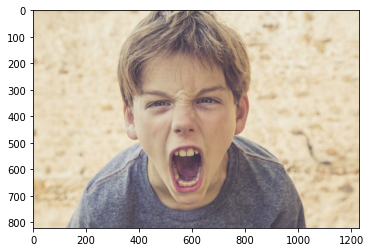

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
frame.shape

(821, 1232, 3)

In [ ]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [ ]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [ ]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
  roi_gray = gray[y:y+h,x:x+w]
  roi_color = frame[y:y+h,x:x+w]
  cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
  facess=faceCascade.detectMultiScale(roi_gray)
  if len(facess)==0:
    print("face not detected")
  else:
    for (ex,ey,ew,eh) in facess:
      face_roi=roi_color[ey:ey+eh,ex:ex+ew]

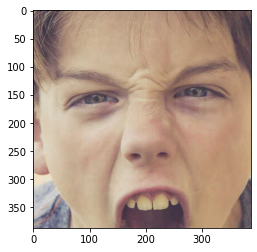

In [ ]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [ ]:
final_image=cv2.resize(face_roi,(img_size,img_size))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255

In [ ]:
predict=new_model.predict(final_image)

In [ ]:
np.argmax(predict)

1

In [ ]:
Classes

['disgust', 'fear', 'neutral', 'angry', 'sad', 'happy', 'surprise']

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('stream_frame("{}", "{}")'.format("Capturing..", ''))
  binary = b64decode(data.split(',')[1])
  jpg_as_np = np.frombuffer(binary, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)
  with open(filename, 'wb') as f:
    f.write(binary)
  return img

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print(filename)
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

ReferenceError: stream_frame is not defined


In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image,clear_output
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
def face_detect():
  import cv2
  from PIL import Image
  import numpy as np
  import os
  from keras.models import load_model
  from time import sleep
  from keras.preprocessing.image import img_to_array
  from keras.preprocessing import image
# start streaming video from webcam
  video_stream()
# label for video
  label_html = 'Capturing...'
# initialze bounding box to empty
  bbox = ''
  count = 0
  while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
      break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    # grayscale image for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
     # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    # get face bounding box for overlay
    for x,y,w,h in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)
      roi_gray = gray[y:y+h,x:x+w]
      roi_gray = cv2.resize(roi_gray,(img_size,img_size))
      facess=faceCascade.detectMultiScale(roi_gray)
      if np.sum([roi_gray])!=0:
        roi_color=frame[y:y+h,x:x+w]
        final_image=cv2.resize(roi_color,(img_size,img_size))
        final_image=np.expand_dims(final_image,axis=0)
        final_image=final_image/255
        predict=new_model.predict(final_image)
        x1,y1,w1,h1=0,0,175,75
        label=Classes[np.argmax(predict)]
        label_position = (x,y)
        cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2) 
      else:
        cv2.putText(bbox_array,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

In [ ]:
face_detect()

<IPython.core.display.Javascript object>